<a href="https://colab.research.google.com/github/CarlosBaez11/RetoTecnologico-Eafit/blob/main/Copia_de_ProyectoTecnologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn

In [8]:
!git clone https://github.com/CarlosBaez11/RetoTecnologico-Eafit.git

Cloning into 'RetoTecnologico-Eafit'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (19/19), 12.03 MiB | 15.67 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [12]:
data=pd.read_excel("/content/RetoTecnologico-Eafit/Caso 01 - Cobranza Sector Financiero.xlsx")

In [16]:
print(data.columns)
print(data.dtypes)
print(data.shape)

Index(['Consecutivo Documento Deudor', 'Nit', 'Nombres', 'Numero Documento',
       'Tipo De Producto', 'PRODUCTO', 'Valor Obligacion', 'Valor Vencido',
       'Regional', 'REGION', 'Abogado', 'Dias Mora', 'FRANJA',
       'Fecha Traslado Para Cobro', 'Fecha Ultima Facturacion', 'Segmento',
       'Oficina Radicacion', 'Red', 'Cuadrante', 'Descripcion Causal',
       'Calificacion Real', 'Fecha De Perfeccionamiento', 'Endeudamiento',
       'Rango endeudamiento', 'Sector Economico', 'Profesion', 'Ocupacion'],
      dtype='object')
Consecutivo Documento Deudor             int64
Nit                                      int64
Nombres                                float64
Numero Documento                       float64
Tipo De Producto                         int64
PRODUCTO                                object
Valor Obligacion                       float64
Valor Vencido                          float64
Regional                                 int64
REGION                                  

In [15]:
data.head(5)

,Consecutivo Documento Deudor,Nit,Nombres,Numero Documento,Tipo De Producto,PRODUCTO,Valor Obligacion,Valor Vencido,Regional,REGION,...,Red,Cuadrante,Descripcion Causal,Calificacion Real,Fecha De Perfeccionamiento,Endeudamiento,Rango endeudamiento,Sector Economico,Profesion,Ocupacion
0,28768192,18,NaN,NaN,3,TARJETAS DE CREDITO,5637605.0,152093.0,2099,BOGOTA,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,CALAMIDAD,2,1978-12-06,5637605.0,2015-01-01 00:00:00,NaN,SIN PROFESION,SIN OFICIO
1,2712044,22,NaN,NaN,5,CONSUMO,40584.0,40584.0,2099,BOGOTA,...,1,SIN CUADRANTE,SIN CAUSAL DE MORA,3,2015-03-11,40584.0,<1M,NaN,SIN PROFESION,SIN OFICIO
2,13587837,23,NaN,NaN,3,TARJETAS DE CREDITO,2786178.0,547088.0,3099,SUR,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD REDUCIDA,RETRASO EN PAGO DE SALARIO,1,2003-03-27,7747280.0,2015-01-01 00:00:00,NaN,SIN PROFESION,JUBILADO
3,23479925,46,NaN,NaN,3,TARJETAS DE CREDITO,5904653.0,1455631.0,2099,BOGOTA,...,1,NO TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,1,1990-09-01,5904653.0,2015-01-01 00:00:00,NaN,SIN PROFESION,SIN OFICIO
4,2712382,92,NaN,NaN,5,CONSUMO,2221125.0,2221125.0,6399,CENTRO,...,1,TIENE VOLUNTAD Y TIENE CAPACIDAD,DESCUIDO,2,2015-05-12,2221125.0,2015-01-01 00:00:00,AGROPECUARIO,AGRICULTOR,TAXISTA


<Axes: >

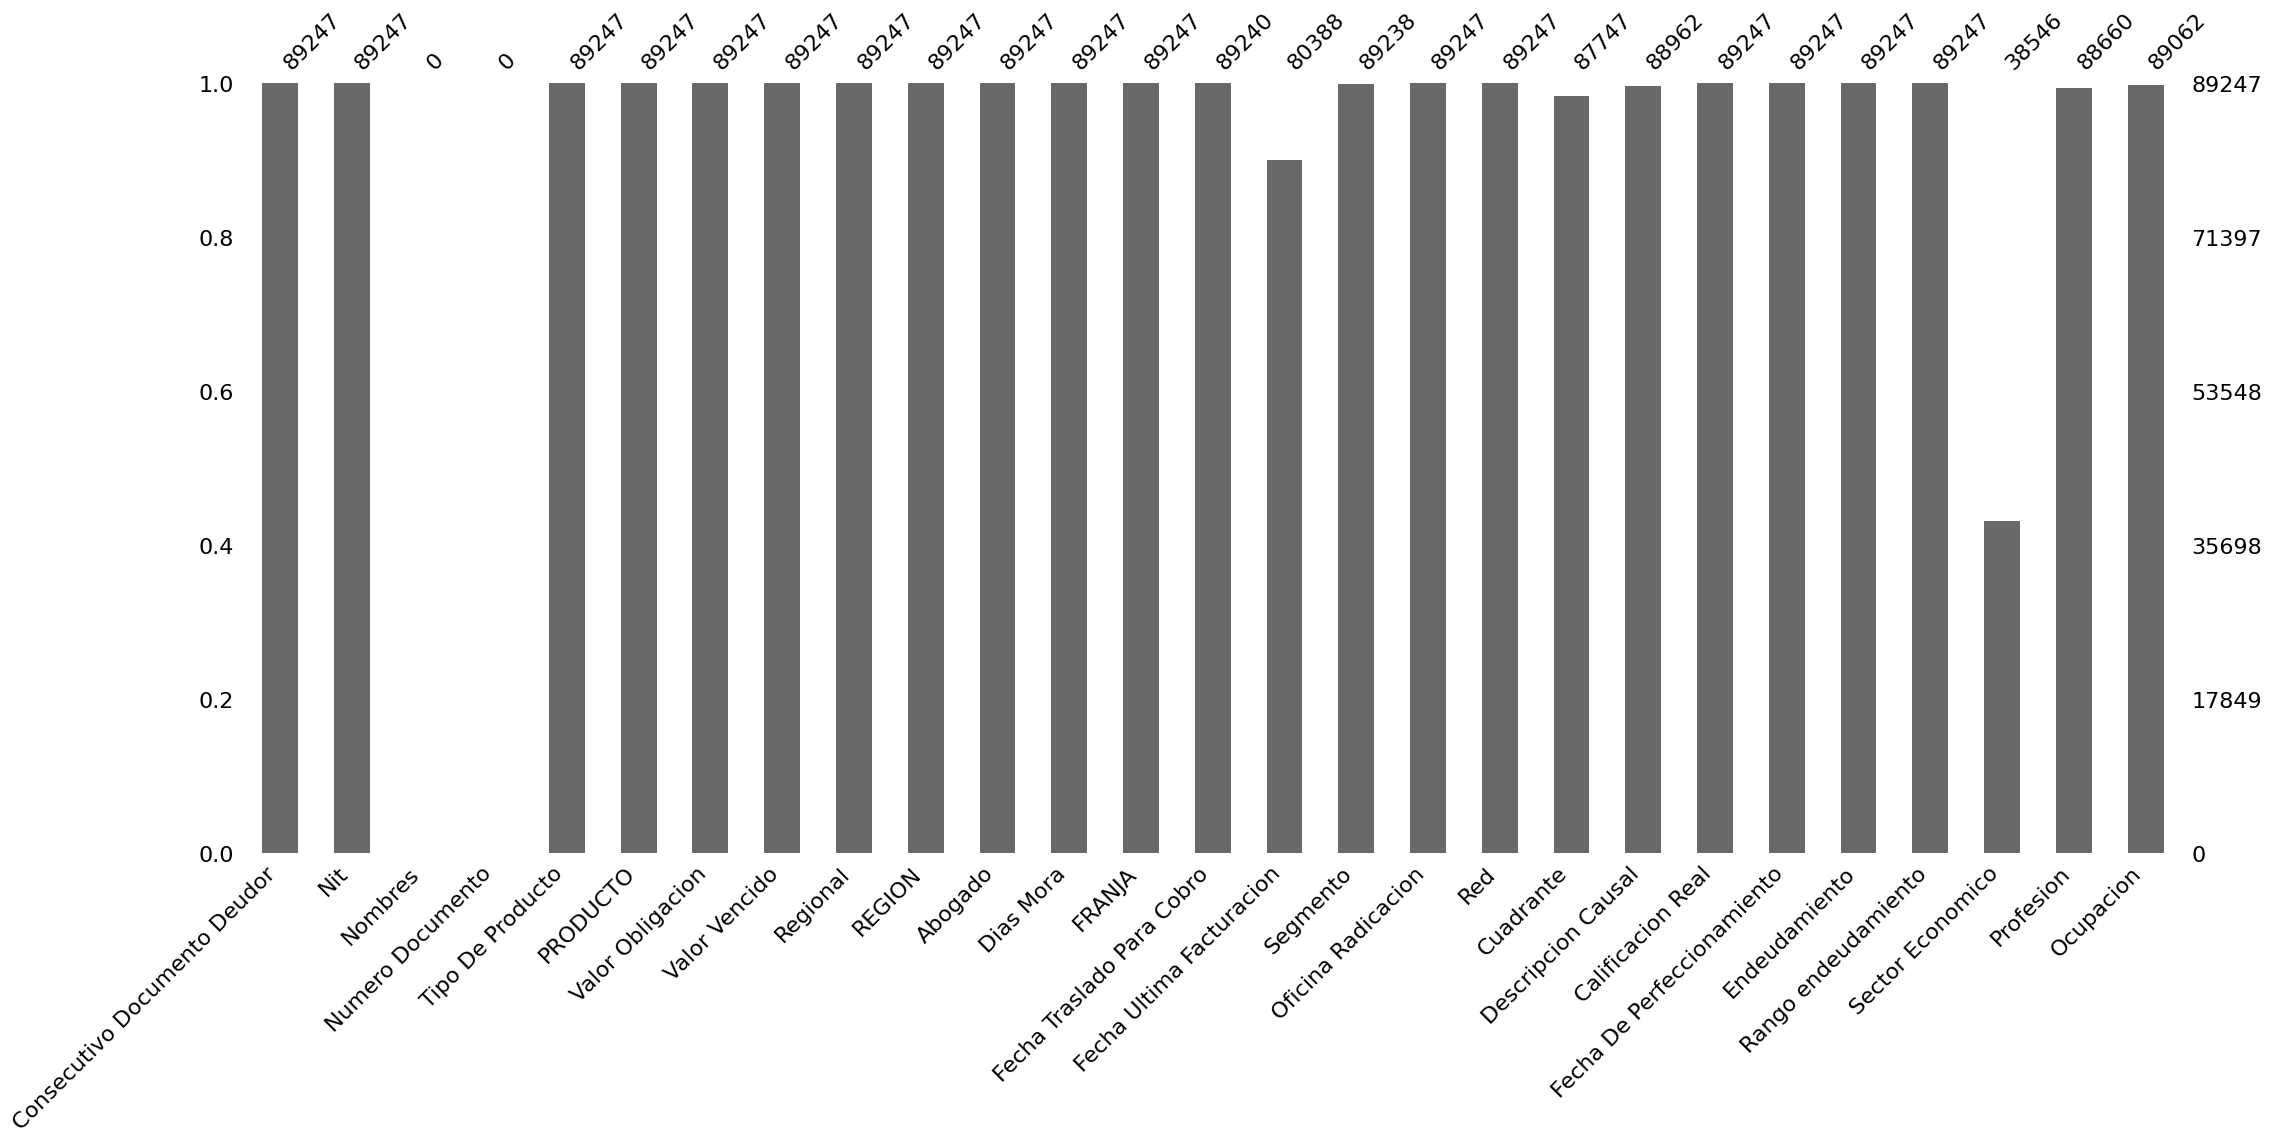

In [18]:
import missingno as msn
msn.bar(data)